# Chargement des Données visualisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"F:\IDSI\Semeste_2\Projet Tutoré\Projet_Air_Quality\Data\DonneeFinal.csv",encoding='latin1',sep=';',on_bad_lines='skip')
print("la dimension de la base de données est :", df.shape)
df.head()


la dimension de la base de données est : (20196, 14)


,Date,Pays,Ville,Continent,AQI,PM2.5,PM10,CO,NO2,O3,SO2,Himidite,Temperature,Vitesse-vent
0,01/01/2021,United Arab Emirates,Dubai,Asia,13.777778,24,2,2.0,2,20.0,2,24.0,24,24
1,01/01/2021,Afghanistan,Kabul,Africa,10.888889,16,2,2.0,2,2.0,2,24.0,24,24
2,01/01/2021,Bangladesh,Dhaka,Asia,11.222222,24,2,2.0,2,2.0,2,24.0,24,19
3,01/01/2021,Bahrain,Manama,Asia,11.777778,24,2,2.0,2,2.0,2,24.0,24,24
4,01/01/2021,Canada,London,North America,72.888889,43,357,3.0,48,48.0,15,48.0,48,46


#### Verification des valeur manquantes

In [2]:
# Vérification des valeurs manquantes dans le DataFrame
valeur_manquantes = df.isnull().sum()
print(valeur_manquantes)

Date            0
Pays            0
Ville           0
Continent       0
AQI             0
PM2.5           0
PM10            0
CO              0
NO2             0
O3              0
SO2             0
Himidite        0
Temperature     0
Vitesse-vent    0
dtype: int64


### Sattistiques descriptives des poluants

In [3]:
# Statistiques descriptives des variables polluantes
polluants = ['PM2.5', 'PM10', 'CO', 'NO2', 'O3', 'SO2']
stats_polluants = df[polluants].describe()
print(stats_polluants)

              PM2.5          PM10            CO           NO2            O3  \
count  20196.000000  20196.000000  20196.000000  20196.000000  20196.000000   
mean      75.018816     85.635918     35.985888     76.354278     59.740592   
std       64.663175    107.256275     45.368524     90.547757     65.697556   
min        2.000000      2.000000      2.000000      2.000000      2.000000   
25%       24.000000      2.000000      2.000000      2.000000      2.000000   
50%       48.000000     48.000000     14.000000     46.000000     47.000000   
75%       96.000000    144.000000     69.000000    118.000000     93.000000   
max      204.000000    357.000000    169.500000    292.000000    229.500000   

                SO2  
count  20196.000000  
mean      30.566894  
std       39.558915  
min        2.000000  
25%        2.000000  
50%        2.000000  
75%       48.000000  
max      117.000000  


#### Representation de la distribution des poluants

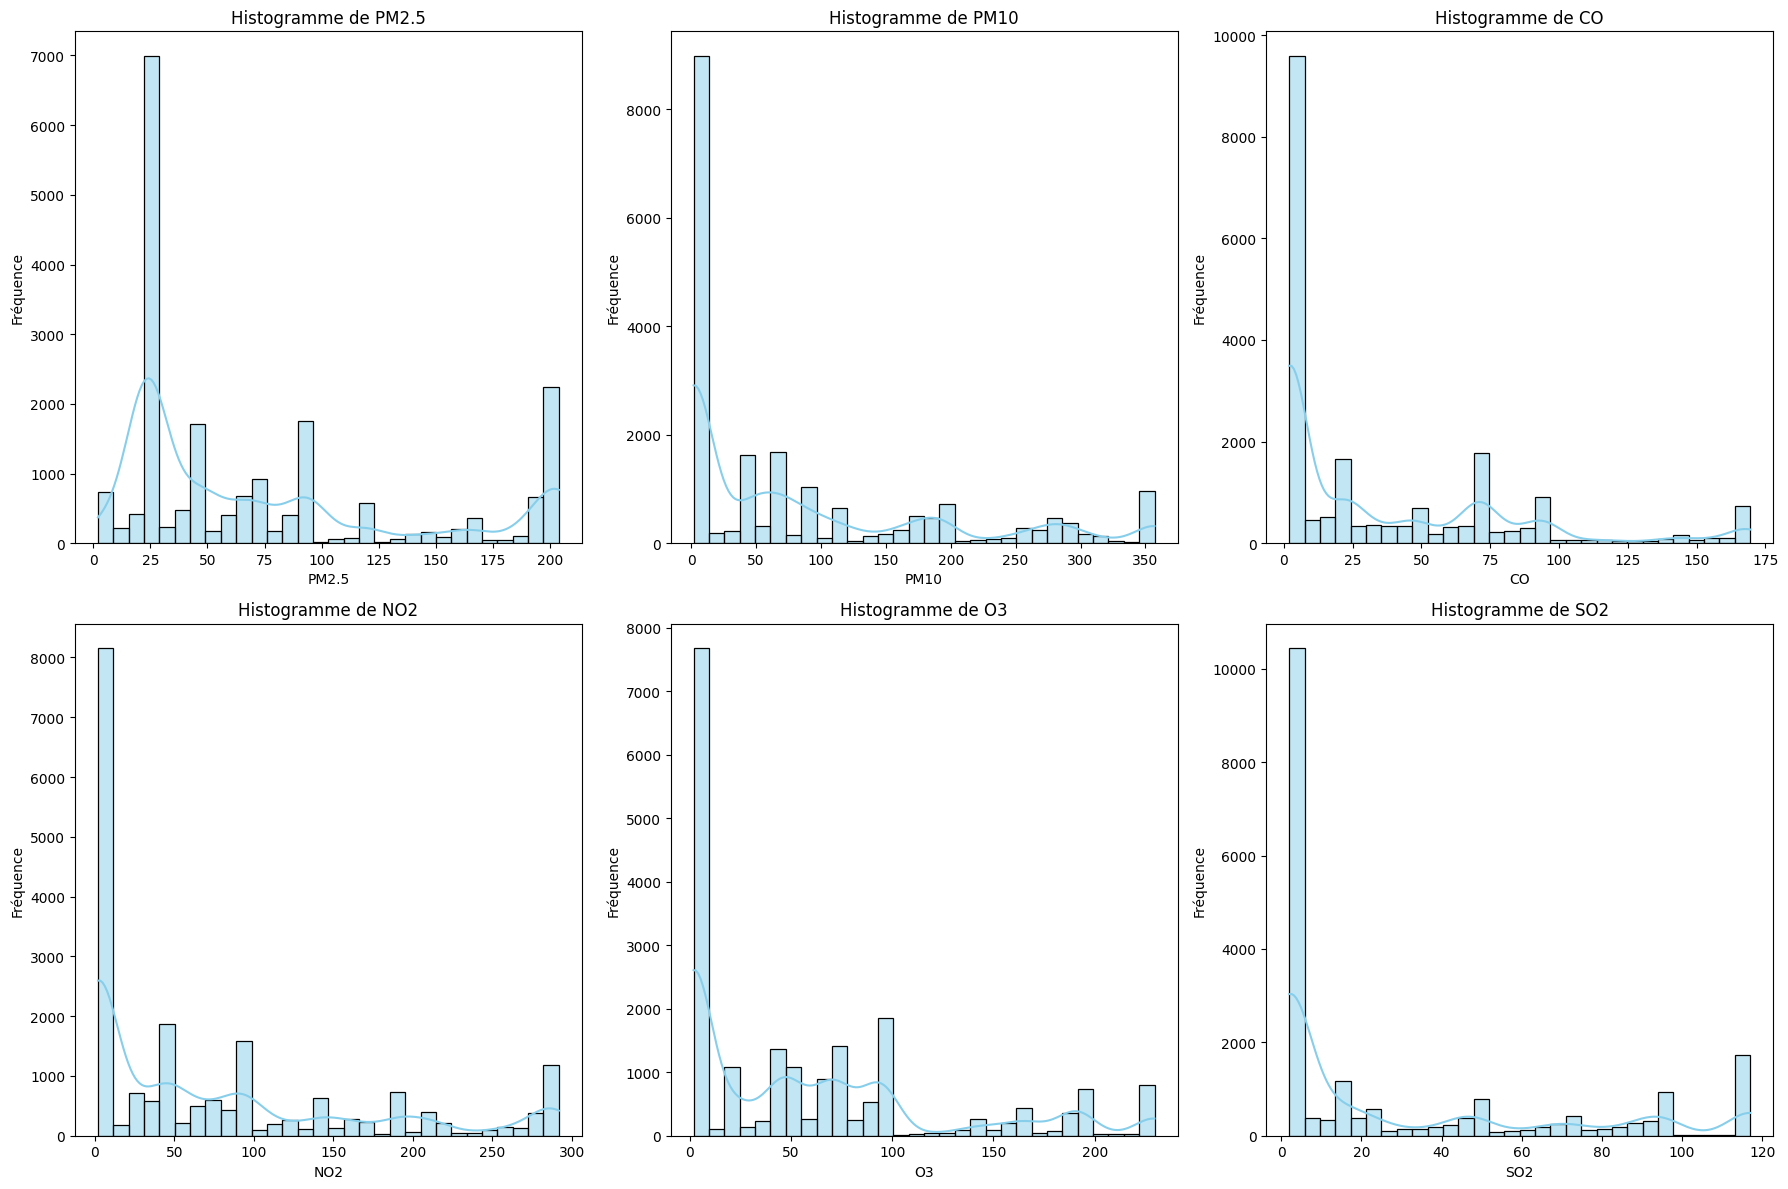

In [4]:
#Représentation graphique des polluants par ville
plt.figure(figsize=(18, 12))
for i, pol in enumerate(polluants):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=pol, color='skyblue', bins=30, kde=True)
    plt.title(f'Histogramme de {pol}')
    plt.xlabel(pol)
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()


# Exploration des Données (EDA)

In [5]:
# Calcul des statistiques descriptives des polluants par ville
stats_ville_polluants = df.groupby('Ville')[polluants].describe()
print(stats_ville_polluants)

               PM2.5                                                      \
               count        mean        std    min     25%    50%    75%   
Ville                                                                      
Abidjan        831.0   22.484958   4.667184    2.0   24.00   24.0   24.0   
Baghdad        712.0   22.710674   4.465274    2.0   24.00   24.0   24.0   
Bamako         425.0   20.291765   7.785421    2.0   24.00   24.0   24.0   
Bangkok         37.0  203.135135   5.260768  172.0  204.00  204.0  204.0   
Beijing        429.0  203.328671   5.342620  141.0  204.00  204.0  204.0   
Berlin         843.0  164.691578  60.997818    8.0   96.00  204.0  204.0   
Chandigarh     744.0   88.545699  11.248475   32.0   86.00   93.0   96.0   
Dammam         253.0    9.853755   9.675199    3.0    3.00    3.0   24.0   
Dhaka          835.0   23.128144   3.485029    2.0   24.00   24.0   24.0   
Dubai          743.0   22.149394   5.602562    2.0   24.00   24.0   24.0   
Dushanbe    

Les 4 villes les plus polluées (selon AQI moyen) : ['Beijing', 'Bangkok', 'Paris', 'Berlin']


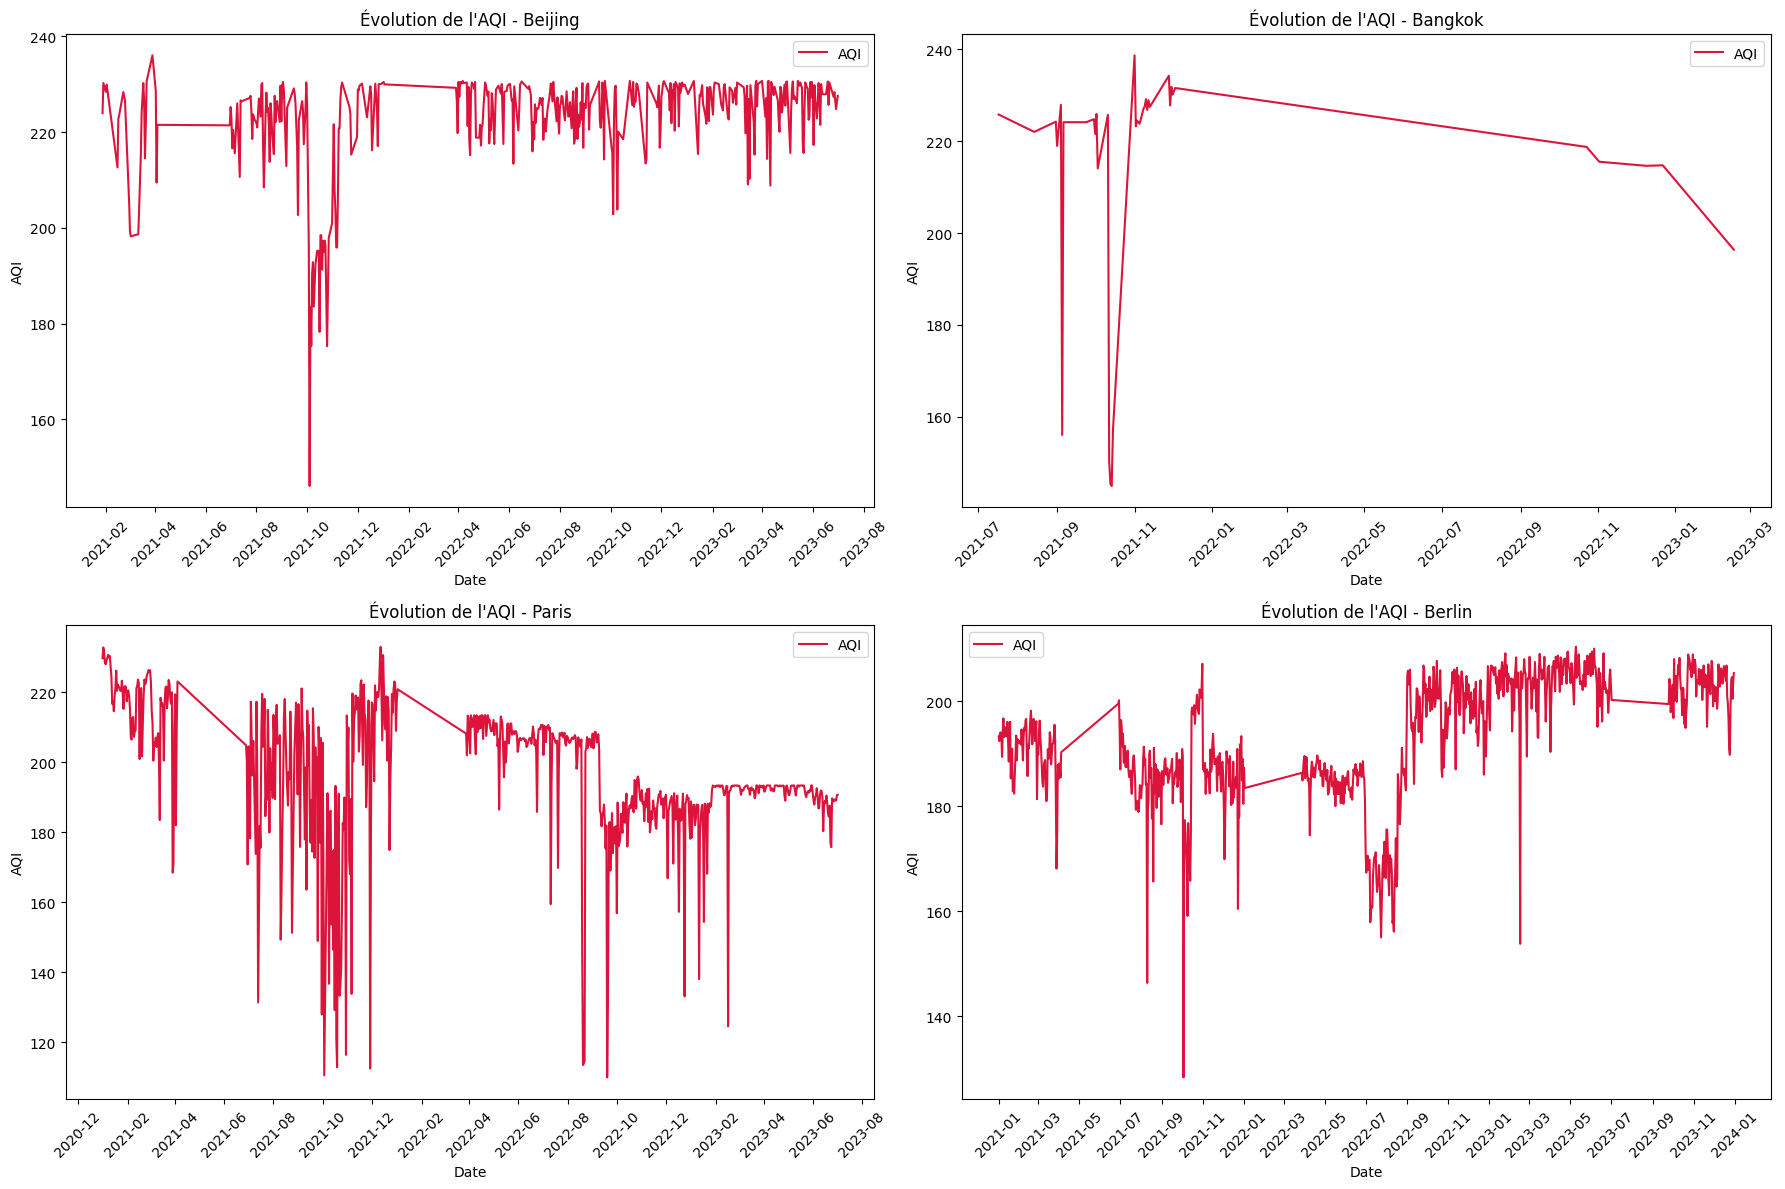

In [6]:
import matplotlib.dates as mdates

# Identifier les 4 villes les plus polluées selon la moyenne de l'AQI
top4_ville = df.groupby('Ville')['AQI'].mean().sort_values(ascending=False).head(4).index.tolist()
print("Les 4 villes les plus polluées (selon AQI moyen) :", top4_ville)

plt.figure(figsize=(18, 12))
for i, ville in enumerate(top4_ville):
    plt.subplot(2, 2, i + 1)
    df_ville = df[df['Ville'] == ville].copy()
    # Conversion de la colonne Date si ce n'est pas déjà fait
    if df_ville['Date'].dtype != 'datetime64[ns]':
        df_ville['Date'] = pd.to_datetime(df_ville['Date'], dayfirst=True, errors='coerce')
    df_ville = df_ville.sort_values('Date')
    plt.plot(df_ville['Date'], df_ville['AQI'], label='AQI', color='crimson')
    plt.title(f"Évolution de l'AQI - {ville}")
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.xticks(rotation=45)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.legend()
plt.tight_layout()
plt.show()


## Boxplote de comparaison par continent et par ville

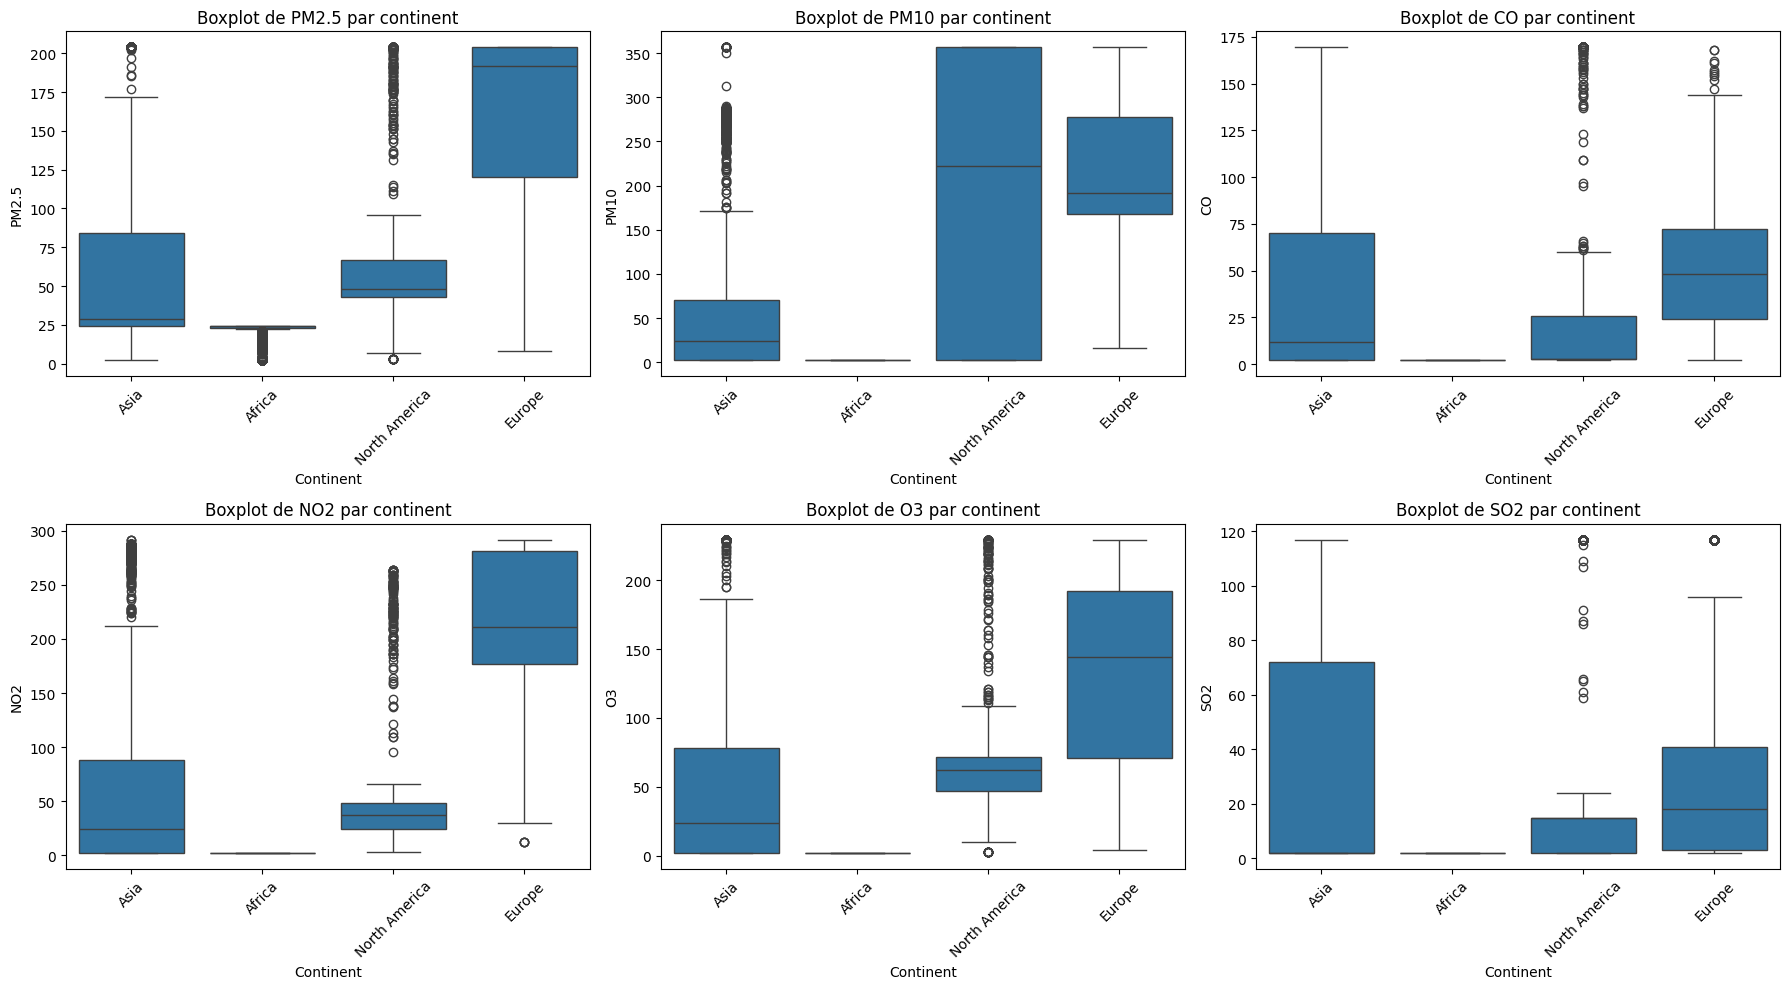

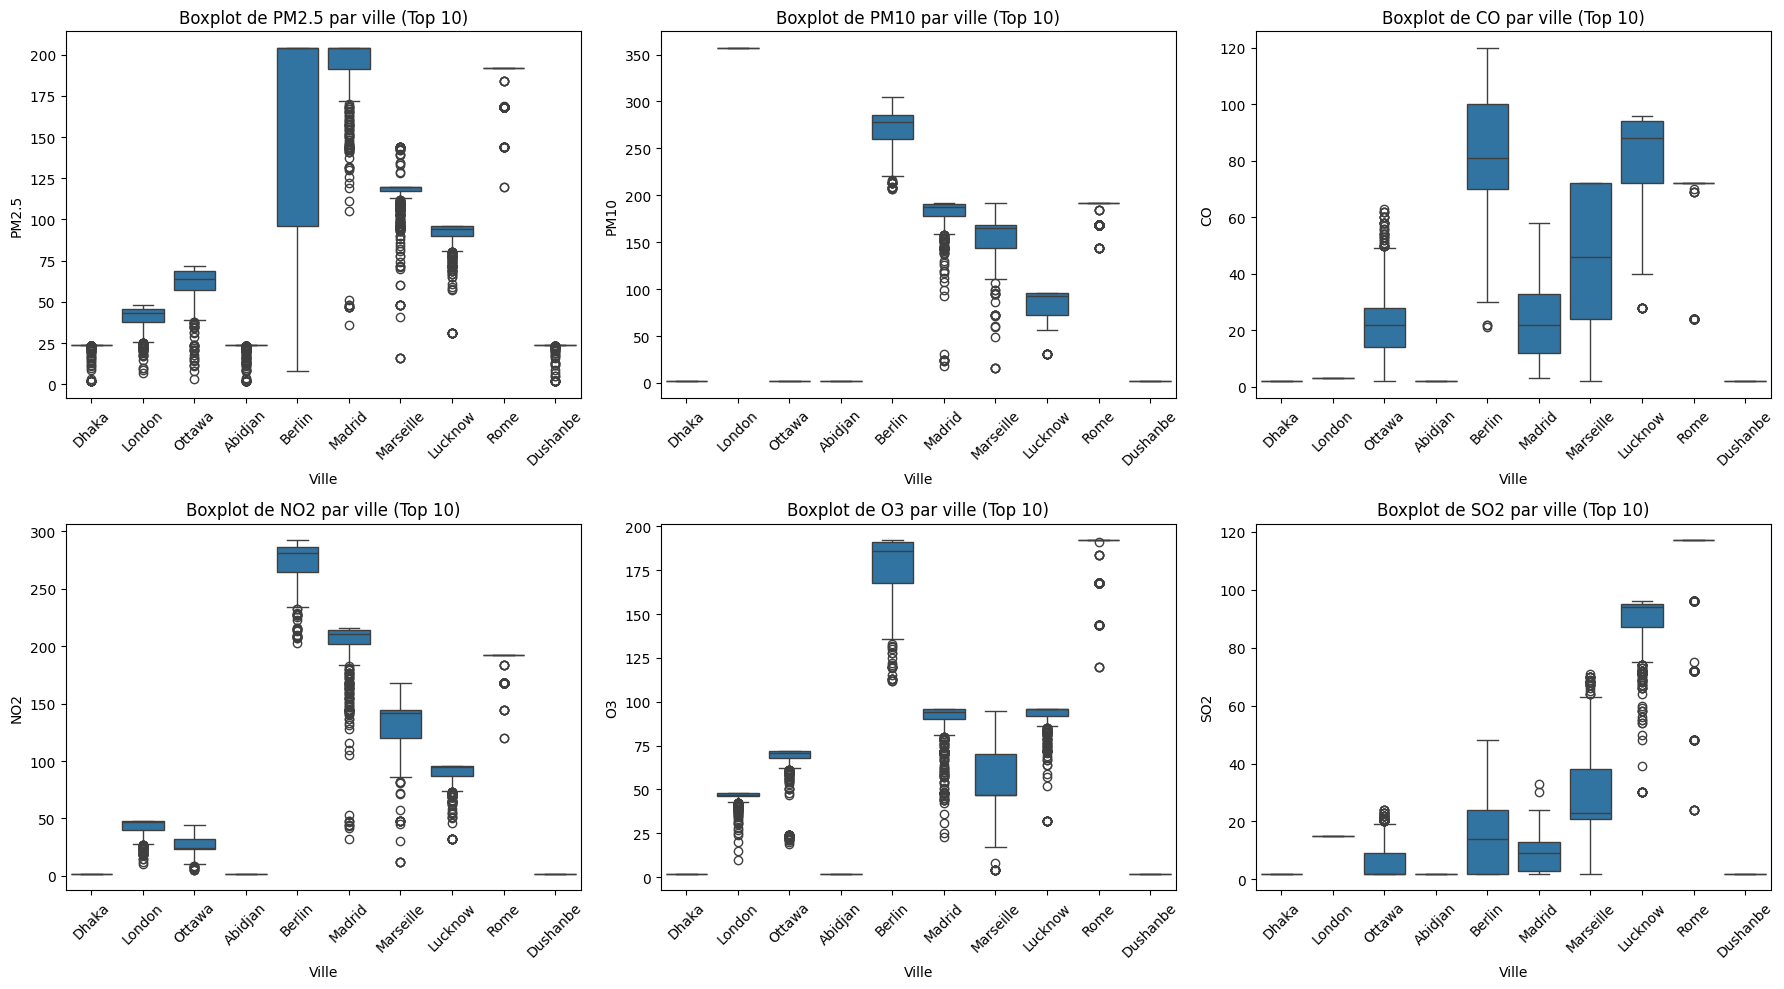

In [7]:
# Boxplot des polluants par continent
plt.figure(figsize=(18, 10))
for i, pol in enumerate(polluants):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='Continent', y=pol)
    plt.title(f'Boxplot de {pol} par continent')
    plt.xlabel('Continent')
    plt.ylabel(pol)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot des polluants par ville (pour les 10 villes les plus représentées)
top_villes = df['Ville'].value_counts().head(10).index
df_top_villes = df[df['Ville'].isin(top_villes)]

plt.figure(figsize=(18, 10))
for i, pol in enumerate(polluants):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df_top_villes, x='Ville', y=pol)
    plt.title(f'Boxplot de {pol} par ville (Top 10)')
    plt.xlabel('Ville')
    plt.ylabel(pol)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Matrice de correlation entre les Polluants

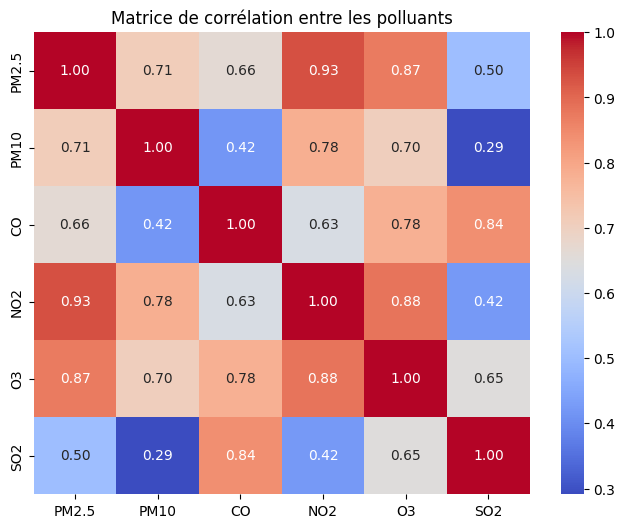

In [8]:
# Calcul et affichage de la matrice de corrélation entre les polluants
corr_matrix = df[polluants].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les polluants")
plt.show()

### ***Interpretation***
*On remarque :*

- Corrélations très fortes entre PM2.5, NO₂ et O₃ ➤ pollution urbaine liée au trafic et aux réactions photochimiques.

- CO et SO₂ fortement liés ➤ sources de combustion.

## Evolution Moyennes mensuelles des poluant et AQI

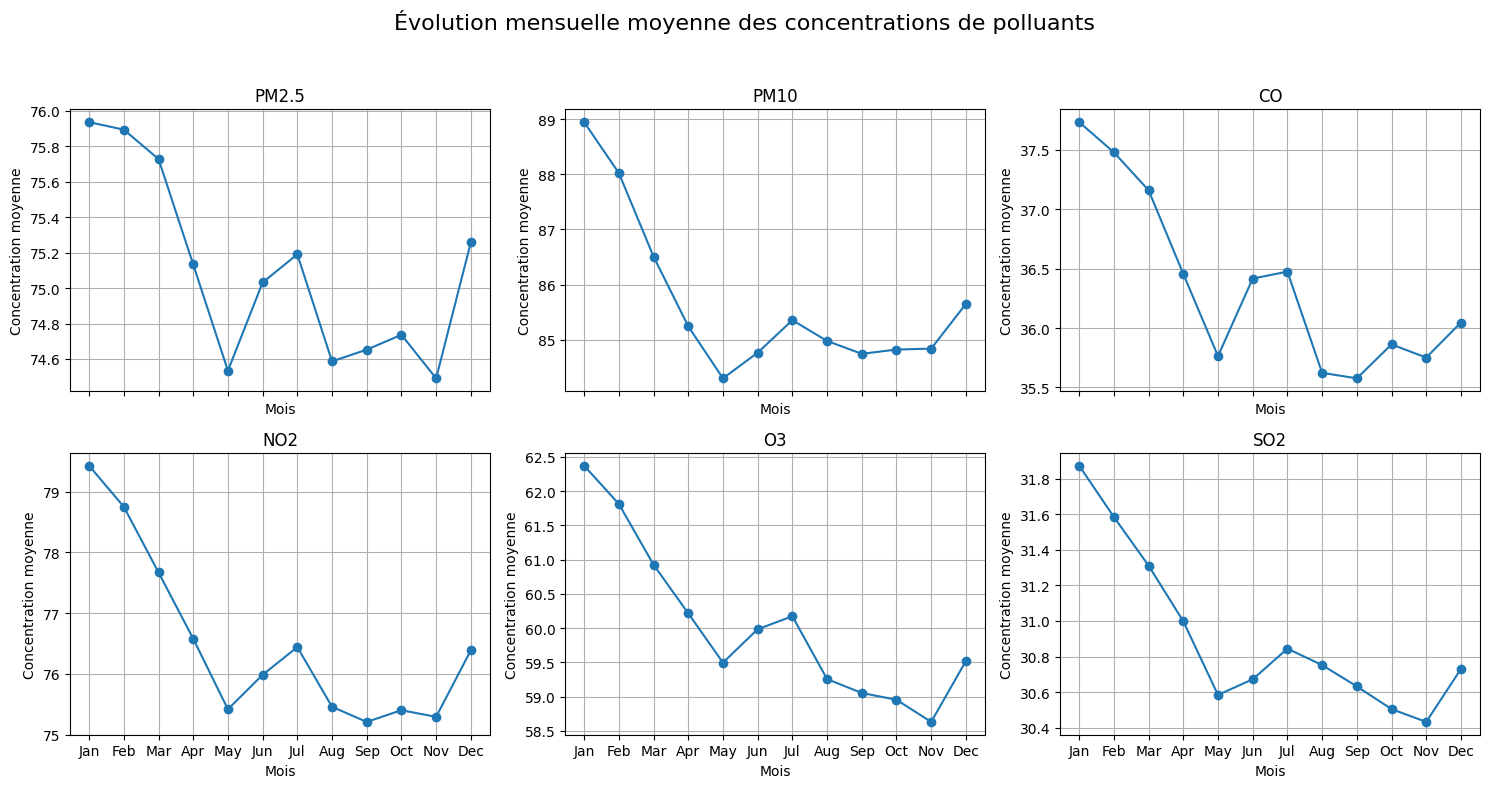

In [ ]:
import calendar

# Assurer que la date est bien au bon format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extraire le mois sous forme numérique
df['Month'] = df['Date'].dt.month

# Calcul des moyennes mensuelles des polluants
pollutants_mean_by_month = df.groupby('Month')[polluants].mean().sort_index()

# Configuration de la figure : 2 lignes x 3 colonnes
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True)
fig.suptitle("Évolution mensuelle moyenne des concentrations de polluants", fontsize=16)

# Noms abrégés des mois pour l’axe x
month_labels = [calendar.month_abbr[int(m)] for m in pollutants_mean_by_month.index]

# Tracé des courbes lissées
for i, poll in enumerate(polluants):
    ax = axes[i // 3, i % 3]
    moyennes_lissées = pollutants_mean_by_month[poll].rolling(window=2, min_periods=1).mean()
    ax.plot(pollutants_mean_by_month.index, moyennes_lissées, marker='o', color='tab:blue')
    ax.set_title(poll)
    ax.set_xlabel("Mois")
    ax.set_ylabel("Concentration moyenne")
    ax.set_xticks(pollutants_mean_by_month.index)
    ax.set_xticklabels(month_labels)
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Interpretation

+ **PM2.5**
 *Faible en janvier–février*

^ Pic net en juin → Cela peut indiquer un accroissement d’activités urbaines ou de phénomènes atmosphériques limitant la dispersion.

+ **PM10**
 *Creux en février*

^ Maximal en décembre → Typique des hivers secs avec accumulation de poussières et moins de vent.

+ **CO (monoxyde de carbone)**
 *Très élevé en janvier*

^ Baisse nette jusqu’à l’été → Cela reflète des émissions liées au chauffage, aux véhicules ou à des combustions domestiques.

+ **NO₂**
 *Pic en juin* → Corrélé souvent à la circulation routière + effet thermique (ozone indirect)

+  **O₃ (ozone troposphérique)**
 *Maximum en août* → Classique : l’ozone est un polluant secondaire, favorisé par le soleil + chaleur + NOx

+ **SO₂**
 *Élevé en janvier*, puis décroît régulièrement → Sans doute lié aux sources fixes (industrie, centrales), plus actives en hiver

 ***En résumé*** 

Des polluants comme *CO, PM10, SO₂* sont plus **élevés en hiver**, souvent liés à la combustion.

L’*ozone* suit une dynamique inverse : maximum estival par photoréactions.

*PM2.5* et *NO2* présentent un pic au **début de l’été**, ce qui peut révéler une accumulation atmosphérique.

### Calcule de l'indice global 
Il permet de synthétiser en une seule valeur l'ensemble des niveaux de pollution mesurés (PM2.5, PM10, CO, NO2, O3, SO2). Il facilite la compréhension de la qualité de l'air pour le grand public et permet de comparer différentes villes, périodes ou régions. Cet indice sert aussi d'outil d'alerte sanitaire et d'aide à la décision pour les autorités.

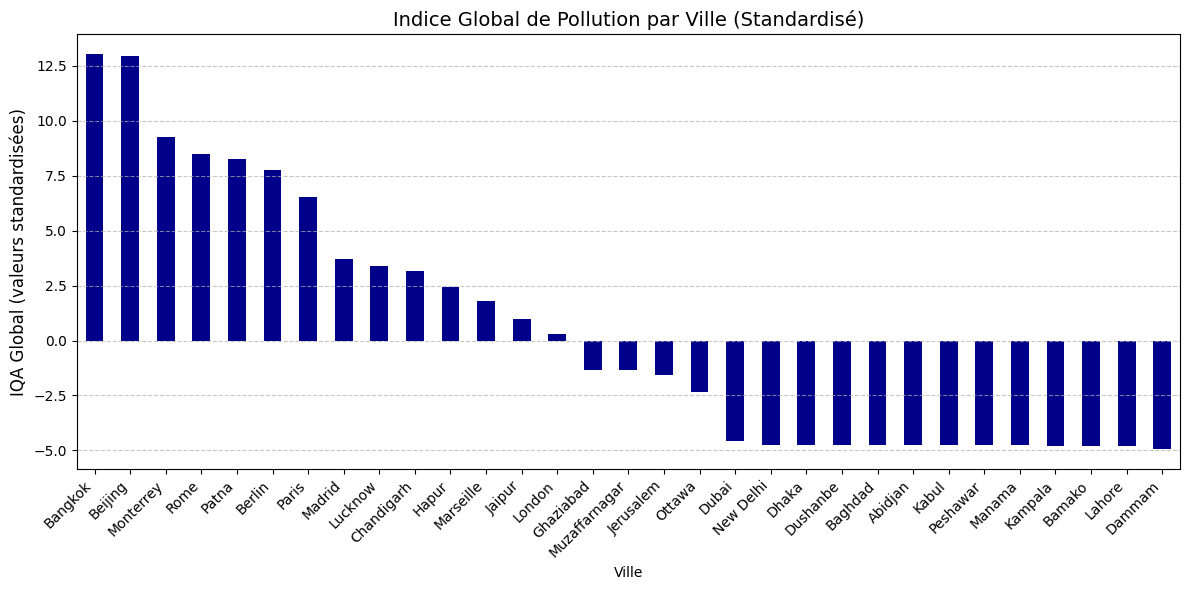

In [12]:
from sklearn.preprocessing import StandardScaler

# Création de l'indice global standardisé si non existant
if 'Indice_Global' not in df.columns:
	scaler = StandardScaler()
	df['Indice_Global'] = scaler.fit_transform(df[polluants]).sum(axis=1)

# Calcul de l'indice global standardisé par ville
indice_par_ville = df.groupby('Ville')['Indice_Global'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
indice_par_ville.plot(kind='bar', color='darkblue')
plt.title("Indice Global de Pollution par Ville (Standardisé)", fontsize=14)
plt.ylabel("IQA Global (valeurs standardisées)", fontsize=12)
plt.xlabel("Ville")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### *Interpretation*

+ Villes en haut du graphique (ex. Bangkok, Beijing, Patna) → pollution très élevée sur plusieurs polluants, risque critique pour la santé.

+ Zone médiane → villes avec pollution modérée à surveiller.

+ Villes en bas (ex. Abidjan, Kampala, Bamako) → niveau de pollution en dessous de la moyenne mondiale.

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


# Classification des villes (Clustering)
 **Objectif :**
Regrouper les villes selon leur profil de pollution, pour :

- Identifier des profils similaires

- Repérer les villes les plus polluées

- Aider à une prise de décision ciblée

### 4.1 – Préparation des données pour clustering

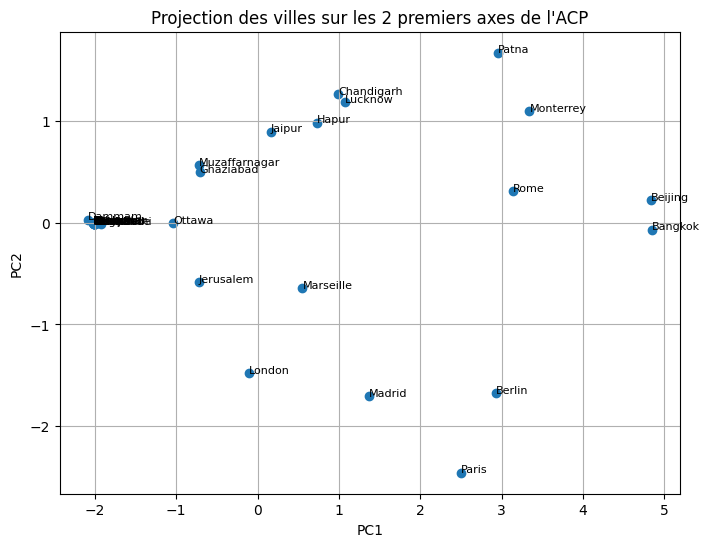

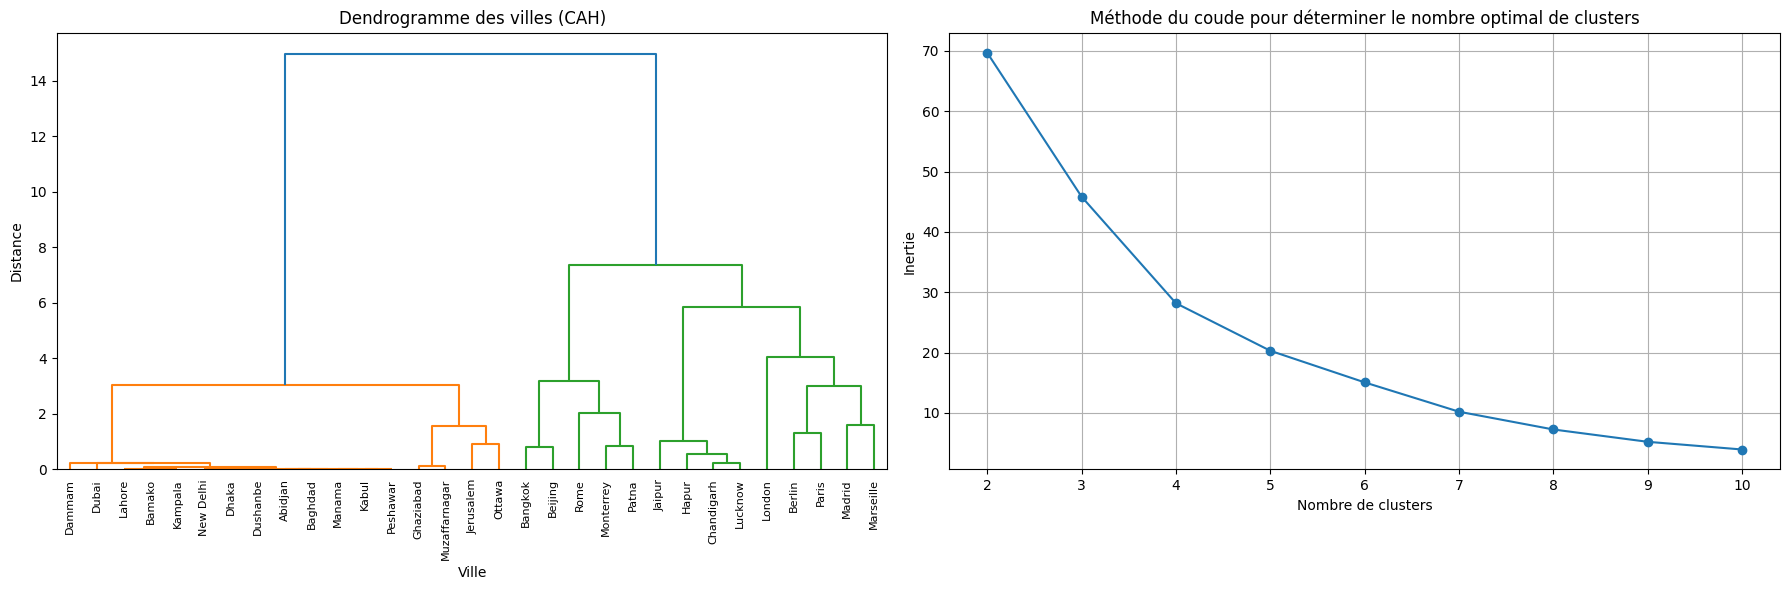

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Préparation des données : moyenne des polluants par ville
X_ville = df.groupby('Ville')[polluants].mean()

# Standardisation
scaler = StandardScaler()
X_scaledk = scaler.fit_transform(X_ville)

# 2. ACP (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaledk)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
for i, ville in enumerate(X_ville.index):
    plt.text(X_pca[i,0], X_pca[i,1], ville, fontsize=8)
plt.title("Projection des villes sur les 2 premiers axes de l'ACP")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


# 3. Courbe de coude pour KMeans
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Calcul du linkage pour le dendrogramme
linked = linkage(X_scaledk, method='ward')

# Dendrogramme (à gauche)
dendrogram(linked, labels=X_ville.index, leaf_rotation=90, ax=axes[0])
axes[0].set_title('Dendrogramme des villes (CAH)')
axes[0].set_xlabel('Ville')
axes[0].set_ylabel('Distance')

# Courbe du coude (à droite)
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaledk)
    inertia.append(kmeans.inertia_)

axes[1].plot(K, inertia, marker='o')
axes[1].set_title('Méthode du coude pour déterminer le nombre optimal de clusters')
axes[1].set_xlabel('Nombre de clusters')
axes[1].set_ylabel('Inertie')
axes[1].grid(True)

plt.tight_layout()
plt.show()


***Le nombre de clusters idéal est probablement k=3, car c'est à ce point que la courbe commence à s'aplatir. Cela suggère qu'ajouter plus de clusters (k>3) n'apporte pas d'amélioration substantielle dans la réduction de l'inertie.*** 

In [ ]:
# 4. KMeans clustering (exemple avec 3 clusters, à ajuster selon la courbe de coude)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaledk)
X_ville['Cluster'] = clusters

# Afficher les villes de chaque cluster sous forme de liste
for cluster_id in range(optimal_k):
    villes_cluster = X_ville[X_ville['Cluster'] == cluster_id].index.tolist()
    print(f"Cluster {cluster_id} ({len(villes_cluster)} villes) : {villes_cluster}")

Cluster 0 (8 villes) : ['Chandigarh', 'Ghaziabad', 'Hapur', 'Jaipur', 'London', 'Lucknow', 'Marseille', 'Muzaffarnagar']
Cluster 1 (8 villes) : ['Bangkok', 'Beijing', 'Berlin', 'Madrid', 'Monterrey', 'Paris', 'Patna', 'Rome']
Cluster 2 (15 villes) : ['Abidjan', 'Baghdad', 'Bamako', 'Dammam', 'Dhaka', 'Dubai', 'Dushanbe', 'Jerusalem', 'Kabul', 'Kampala', 'Lahore', 'Manama', 'New Delhi', 'Ottawa', 'Peshawar']


### Visualisation des clusters

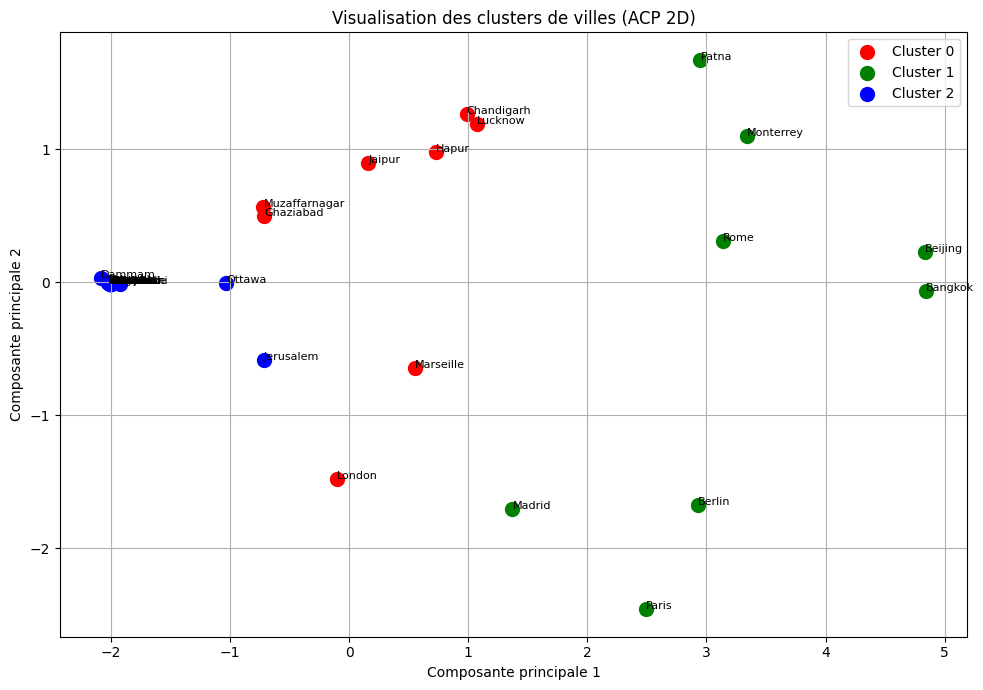

In [17]:
# Visualisation des clusters sur la projection PCA
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for cluster_id in range(optimal_k):
    mask = X_ville['Cluster'] == cluster_id
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                label=f'Cluster {cluster_id}', 
                color=colors[cluster_id % len(colors)], s=100)
    for i, ville in enumerate(X_ville.index[mask]):
        plt.text(X_pca[mask, 0][i], X_pca[mask, 1][i], ville, fontsize=8)

plt.title("Visualisation des clusters de villes (ACP 2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### *Interprétation :*

+ *Cluster 1 (vert)* semble regrouper les villes avec les profils de pollution les plus intenses et variés. Leur position éloignée des autres suggère un niveau élevé ou combiné sur plusieurs polluants (ex : PM2.5 + NO2 + O3).

+ *Cluster 0 (rouge)* représente probablement des villes modérément polluées ou à profil linéaire (polluant dominant clair).

+ *Cluster 2 (bleu)* rassemble des villes moins polluées, ou influencées par des facteurs plus climatiques (vent, humidité...).

In [18]:
# 1. Création de la variable cible catégorique à partir de l'AQI
# Exemple de classification selon l'AQI (modifiable selon vos besoins)
def aqi_to_etat(aqi):
    if aqi <= 50:
        return 'Bon'
    elif aqi <= 100:
        return 'Modéré'
    elif aqi <= 150:
        return 'Malsain pour sensibles'
    elif aqi <= 200:
        return 'Malsain'
    elif aqi <= 300:
        return 'Très malsain'
    else:
        return 'Dangereux'

df['Etat_Air'] = df['AQI'].apply(aqi_to_etat)


# Prediction

**Pour prédire l’impact des polluants sur la santé humaine, animale et la végétation, nous avons choisi comme cible la variable catégorique `Etat_Air`, dérivée de l’AQI, qui synthétise la qualité de l’air en niveaux de risque compréhensibles. Les modèles sélectionnés (LogisticRegression, RidgeClassifier, SGDClassifier et Perceptron) sont adaptés à la classification multiclasse, robustes face à des données de grande dimension, et permettent une interprétation directe de l’influence des polluants sur la qualité de l’air. Ce choix permet de comparer différentes approches linéaires pour identifier la méthode la plus performante dans ce contexte.**

In [19]:
# 2. Sélection des variables explicatives (ici les polluants)
X = df[polluants]
y = df['Etat_Air']
# Standardisation des variables explicatives
scaler = StandardScaler()
X = scaler.fit_transform(X)
# 3. Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Définition des 4 méthodes de "régression linéaire" pour classification
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RidgeClassifier': RidgeClassifier(),
    'SGDClassifier': SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3),
    'Perceptron': Perceptron(max_iter=1000, tol=1e-3)
}

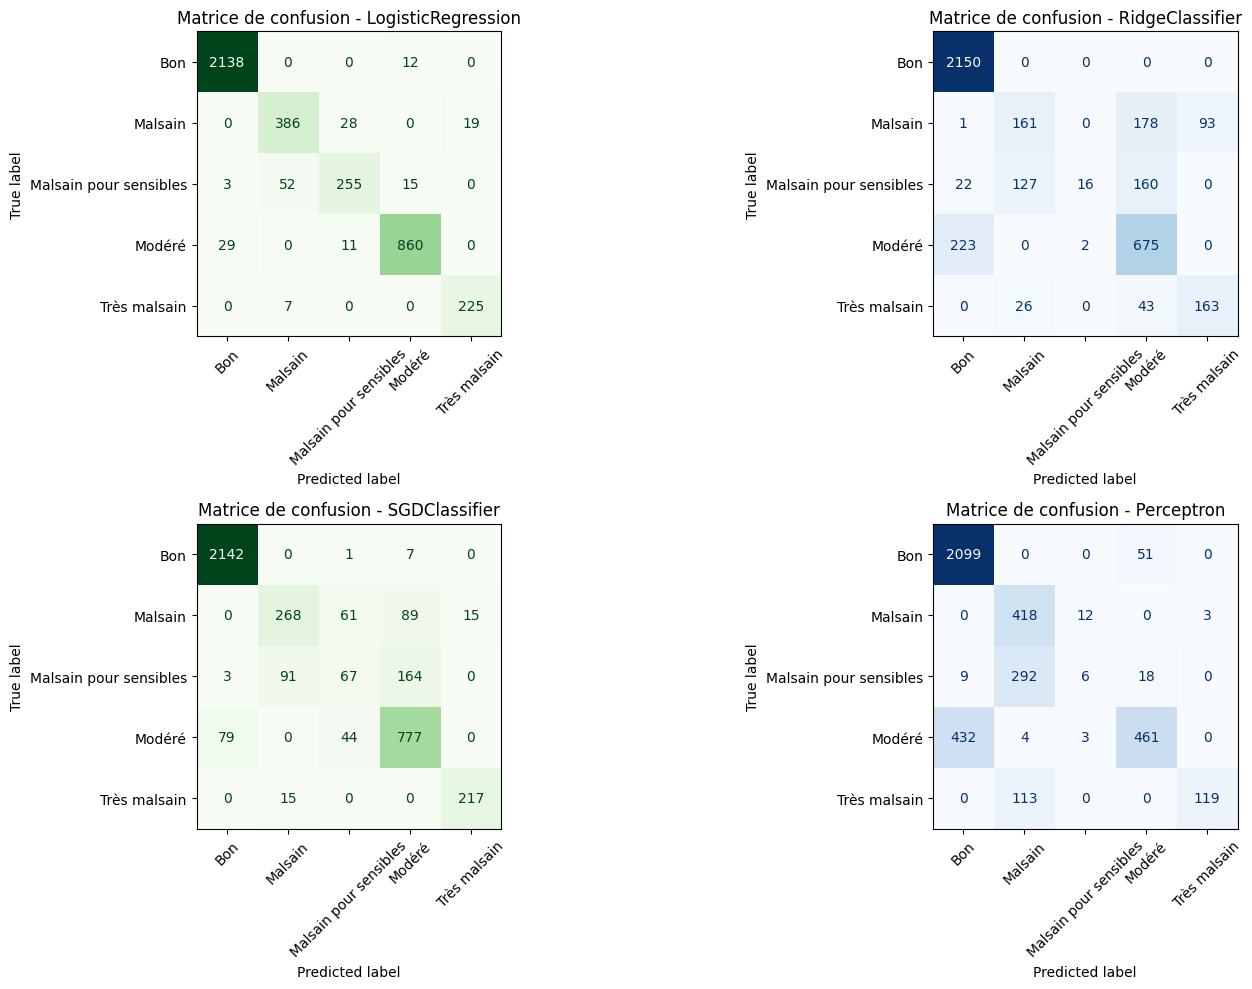

In [ ]:
# 5. Entraînement, prédiction et matrice de confusion pour chaque modèle
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
plt.subplots_adjust(wspace=0.2, hspace=0.3)
cmaps = ['Greens', 'Blues', 'Greens', 'Blues']  
for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=axes[idx], xticks_rotation=45, colorbar=False, cmap=cmaps[idx % len(cmaps)])
    axes[idx].set_title(f"Matrice de confusion - {name}")

plt.tight_layout()
plt.show()

In [ ]:
# Affichage de la précision (accuracy) de chaque modèle sur le jeu de test
for name, model in models.items():
    # Ajuster le modèle s'il n'est pas déjà entraîné
    if not hasattr(model, "classes_"):
        model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Précision de {name} : {score:.4f}")

Précision de LogisticRegression : 0.9564
Précision de RidgeClassifier : 0.7834
Précision de SGDClassifier : 0.8656
Précision de Perceptron : 0.7681


### Construction de la courbe ROC et AIC 

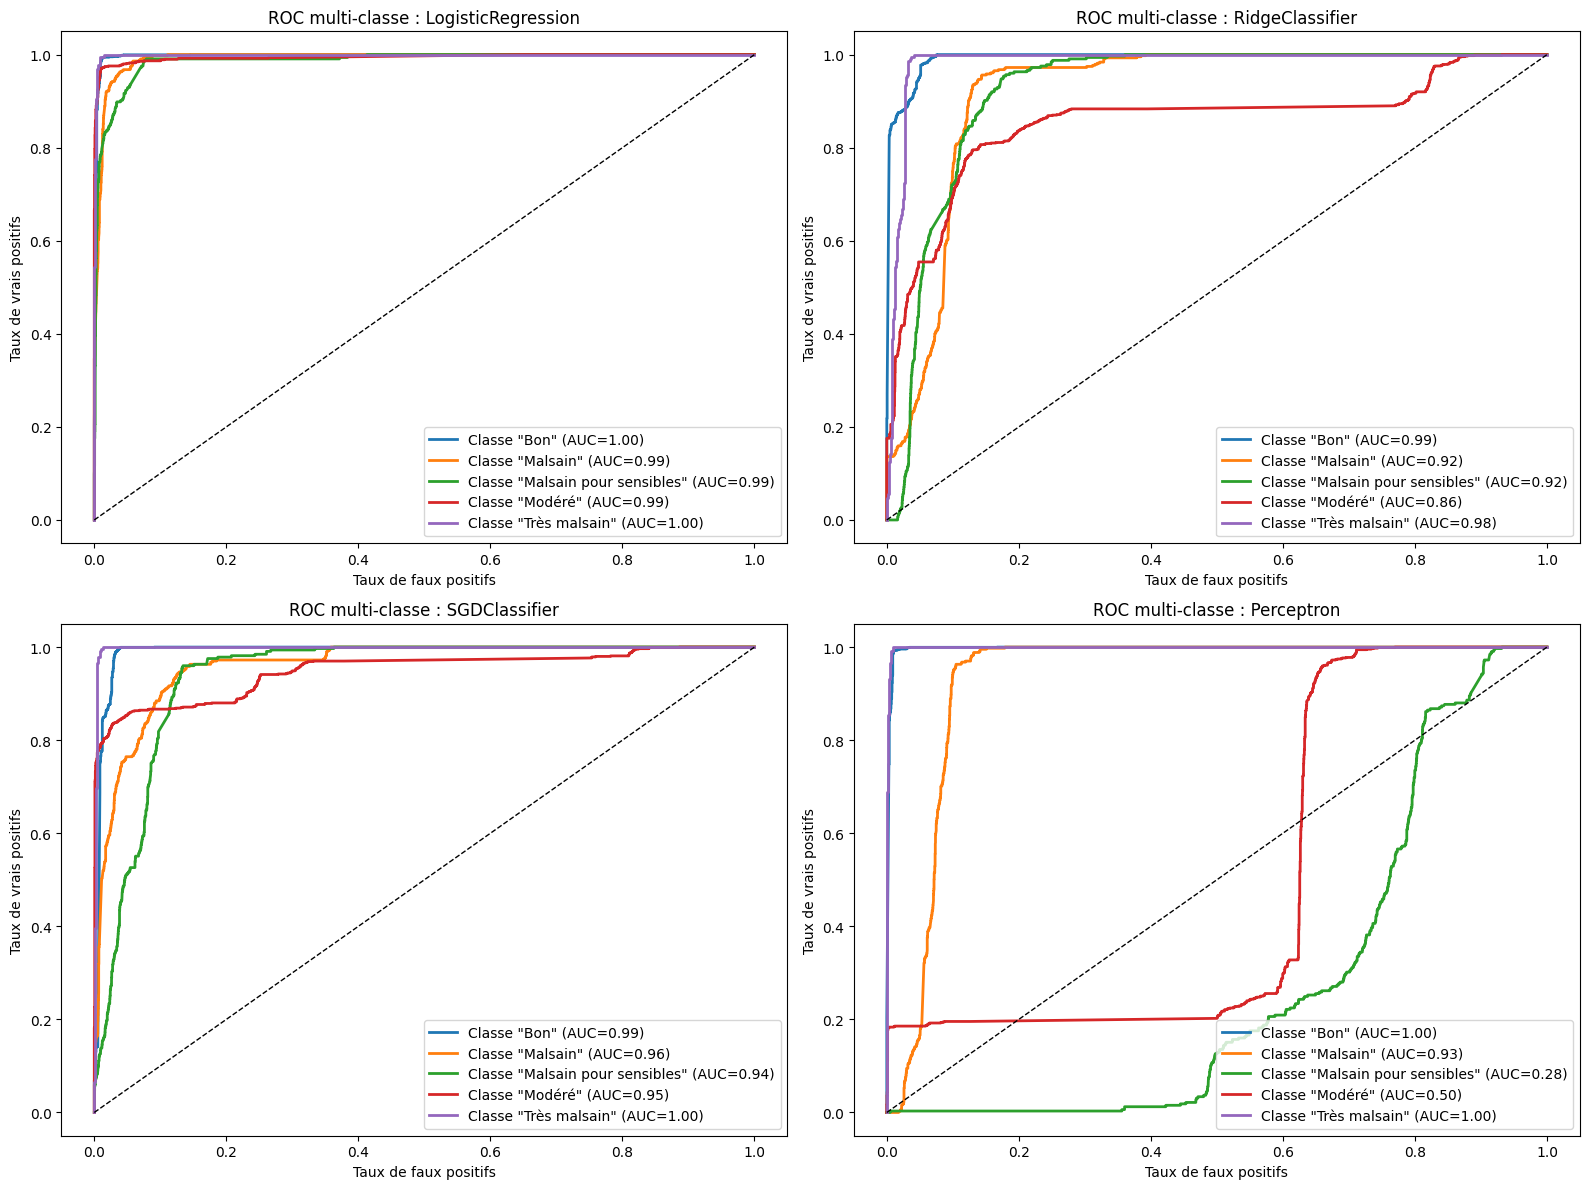

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, log_loss
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        if y_score.ndim == 1:
            y_score = np.vstack([1 - y_score, y_score]).T
    else:
        axes[idx].set_visible(False)
        continue

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        axes[idx].plot(fpr, tpr, lw=2, label=f'Classe "{classes[i]}" (AUC={roc_auc:.2f})')

    axes[idx].plot([0, 1], [0, 1], 'k--', lw=1)
    axes[idx].set_xlabel('Taux de faux positifs')
    axes[idx].set_ylabel('Taux de vrais positifs')
    axes[idx].set_title(f'ROC multi-classe : {name}')
    axes[idx].legend(loc='lower right')

plt.tight_layout()
plt.show()


### *Interpretation*

+ *Logistic Regression :* excellent partout (AUC ≈ 1) -> modèle à privilégier 
+ *SGDClassifier :* très bonnes performances -> alternative légère et rapide 
+ *RidgeClassifier :* correct mais moins fiable sur les classes proches 
+ *Perceptron :* faible performance sur les classes “modéré” et “malsain” -> à éviter ici

 **Conclusion :** la régression logistique offre la meilleure précision